In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="fPukGuuQb52zd0FUvCdf")
project = rf.workspace("microsoft").project("coco-pose-detection")
version = project.version(6)
dataset = version.download("coco")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 26.0 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to COCO-Pose-Detection-6 in coco:: 100%|██████████| 5088/5088 [00:00<00:00, 9842.51it/s] 



0: 640x640 1 person, 38.0ms
Speed: 2.5ms preprocess, 38.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


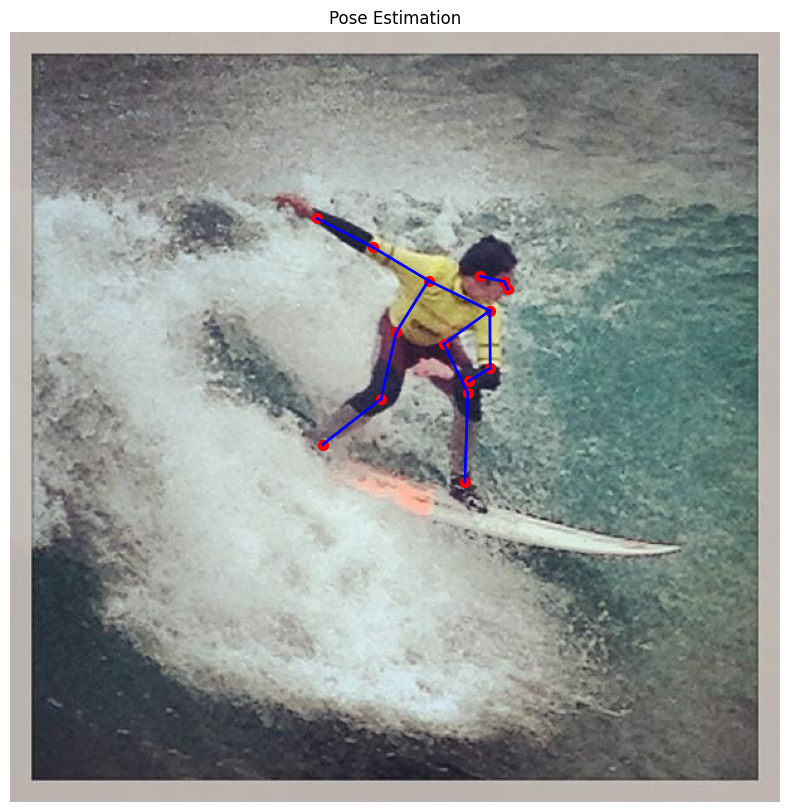

In [8]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Load the YOLO model
model = YOLO("models/yolo11x-pose.pt")  # Load an official YOLO model for pose estimation

# Define skeleton connections (using COCO format)
skeleton = [
    (5, 6),    # Left shoulder to right shoulder
    (5, 11),   # Left shoulder to left hip
    (6, 12),   # Right shoulder to right hip
    (11, 13),  # Left hip to left knee
    (13, 15),  # Left knee to left ankle
    (12, 14),  # Right hip to right knee
    (14, 16),  # Right knee to right ankle
    (5, 7),    # Left shoulder to left elbow
    (7, 9),    # Left elbow to left wrist
    (6, 8),    # Right shoulder to right elbow
    (8, 10),   # Right elbow to right wrist
    (0, 1),    # Nose to left eye
    (0, 2),    # Nose to right eye
    (1, 3),    # Left eye to left ear
    (2, 4)     # Right eye to right ear
]

# Specify the path to the single image file
image_path = "COCO-Pose-Detection-6/train/000000004765_jpg.rf.2a58139389d70df55980975095328210.jpg"  # Replace with your image file path

# Read the image
frame = cv2.imread(image_path)

# Perform prediction
results = model(frame)  # Predict on the current frame

# Prepare the figure
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for plotting

# Check if keypoints are detected
if results[0].keypoints is not None and results[0].keypoints.data.shape[0] > 0:
    keypoints = results[0].keypoints.data[0, :, :2].cpu().numpy()  # Convert keypoints to numpy array

    # Plot keypoints on the image
    for keypoint in keypoints:
        if keypoint[0] > 0 and keypoint[1] > 0:  # Only draw valid keypoints
            plt.scatter(keypoint[0], keypoint[1], color='red', s=50)  # Red circles for keypoints

    # Plot skeleton connections
    for i, j in skeleton:
        if i < len(keypoints) and j < len(keypoints):  # Check if the indices are valid
            pt1, pt2 = keypoints[i], keypoints[j]
            if (pt1[0] > 0 and pt1[1] > 0) and (pt2[0] > 0 and pt2[1] > 0):  # Check for valid coordinates
                plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]], color='blue', linewidth=2)  # Blue lines

# Show the plot with detected keypoints and skeleton
plt.axis('off')  # Hide axes
plt.title('Pose Estimation')
plt.show()